# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [39]:
#Type your code here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [4]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [5]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [6]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [7]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

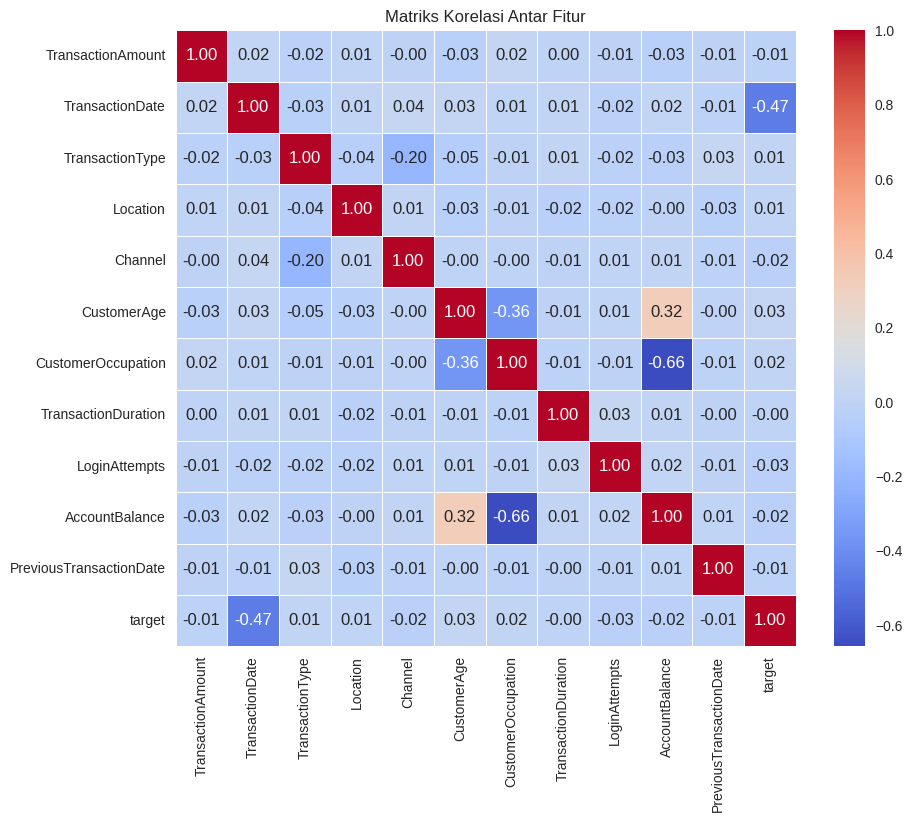

In [28]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
correlation_matrix = df.corr(numeric_only=True)
# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

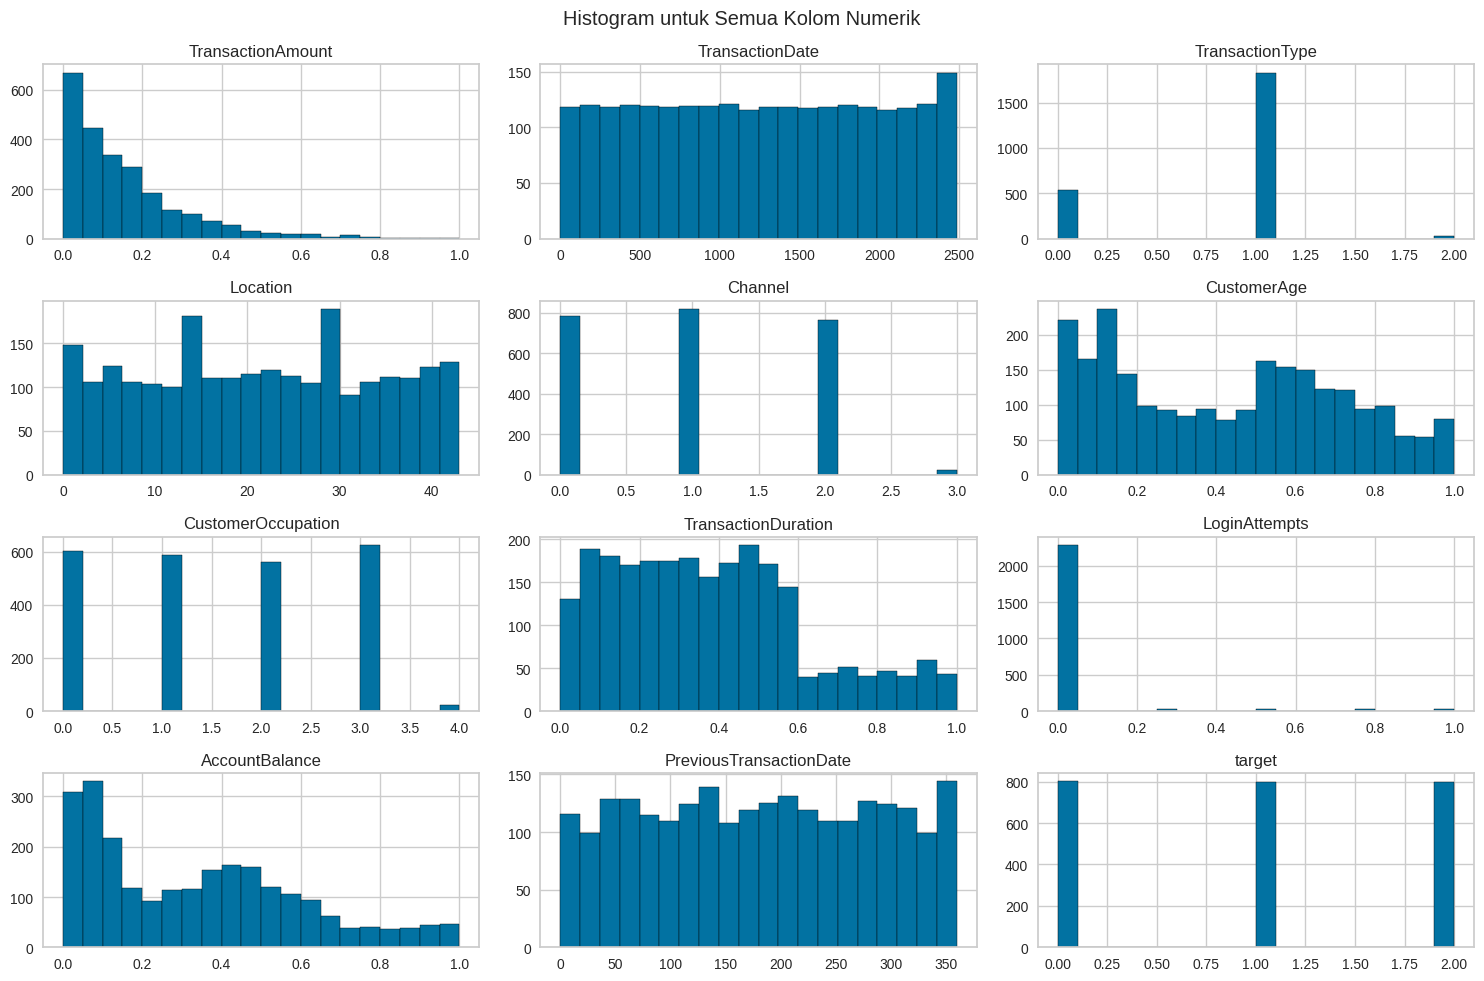

In [29]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram untuk Semua Kolom Numerik")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

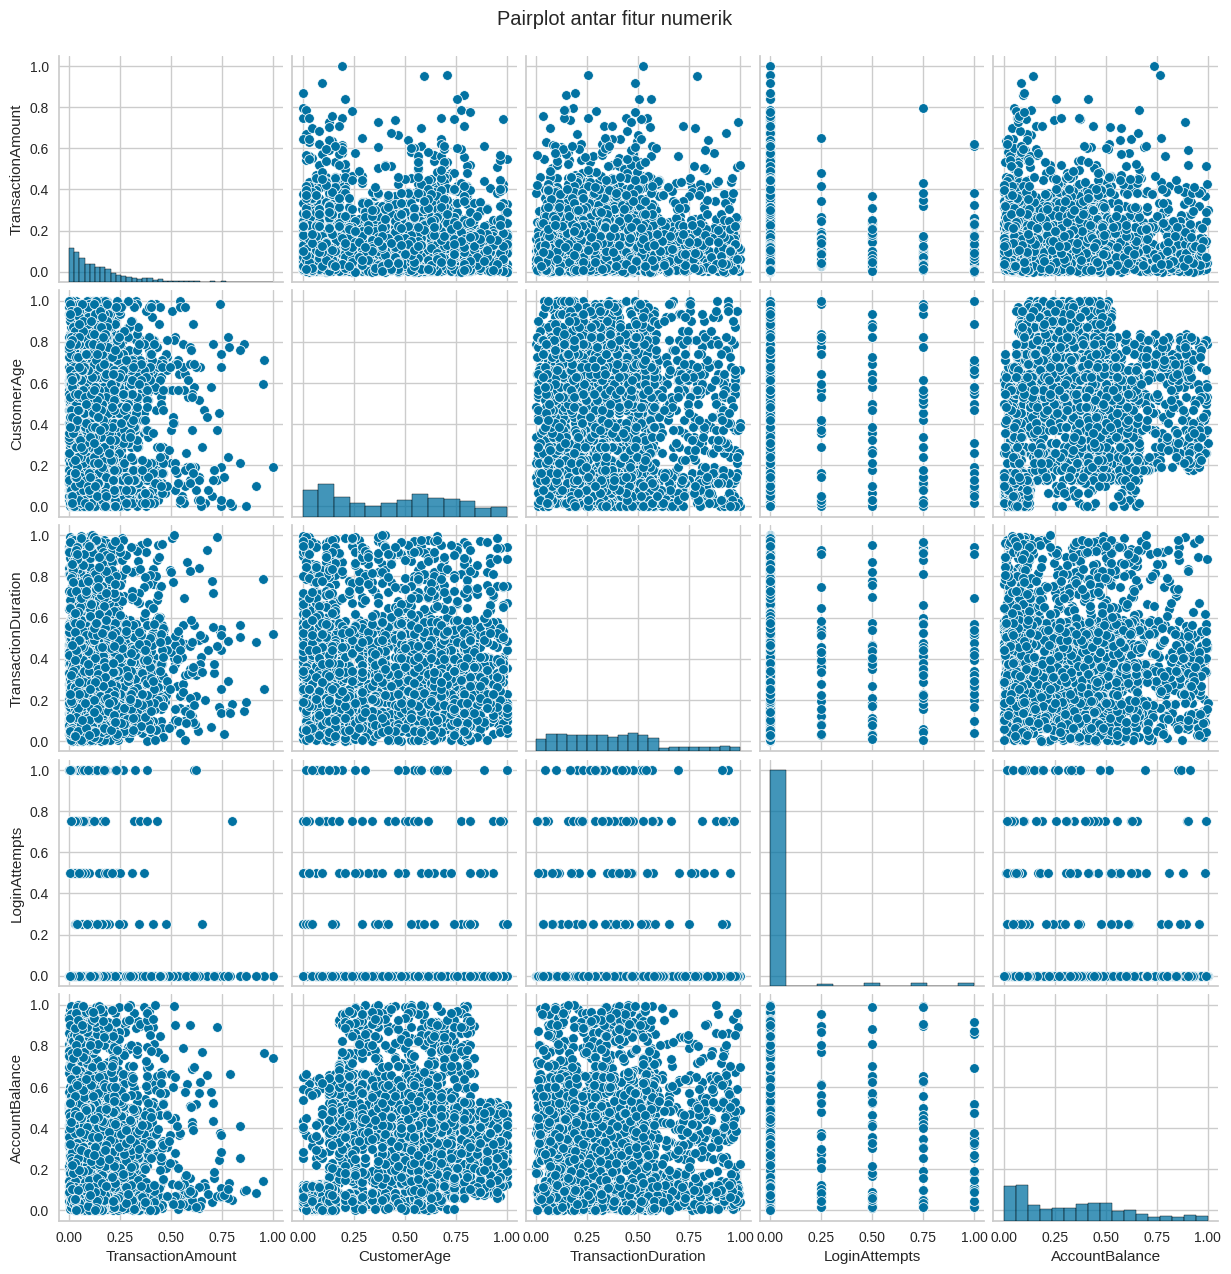

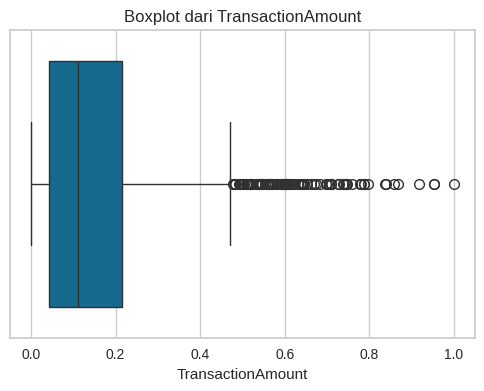

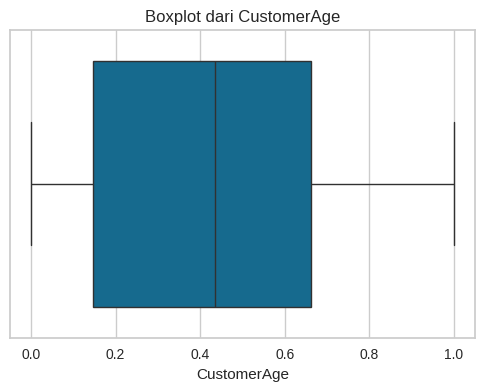

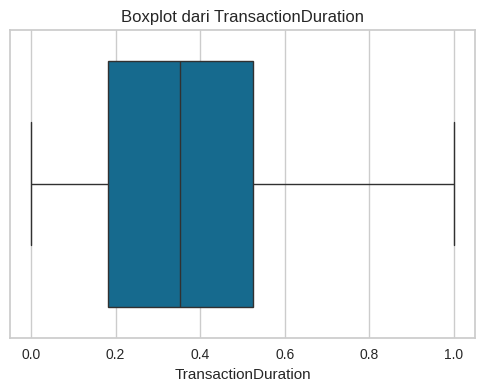

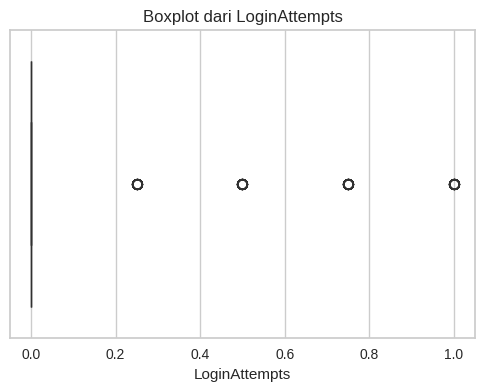

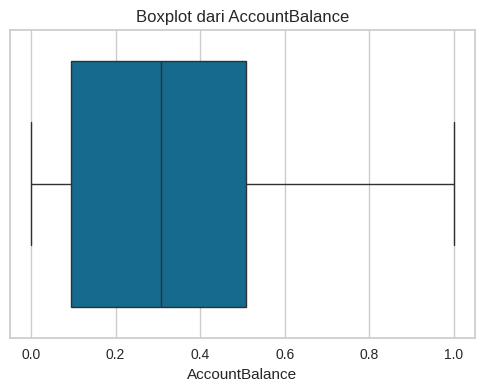

In [31]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot antar fitur numerik", y=1.02)
plt.show()
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot dari {col}')
    plt.show()
if 'Kategori' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Kategori', y='Nilai', data=df)
    plt.title("Rata-rata Nilai berdasarkan Kategori")
    plt.xticks(rotation=45)
    plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [9]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols=df.select_dtypes(include=['number']).columns

scaler=MinMaxScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [11]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
label_encoder=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col]=label_encoder.fit_transform(df[col])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,0.007207,680,1,36,365,186,14,0,0.838710,0,0.244828,0.0,0.336832,105
1,1,450,0.195940,1178,1,15,50,82,51,0,0.806452,0,0.451724,0.0,0.918055,192
2,2,18,0.065680,1262,1,23,229,342,8,2,0.016129,3,0.158621,0.0,0.068637,41
3,3,68,0.096016,818,1,33,182,300,1,2,0.129032,3,0.051724,0.0,0.569198,163
4,4,406,0.006874,1939,0,1,298,500,90,2,NaN,3,0.648276,0.0,0.492591,16


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_id=['TransactionID','AccountID','IP Address','DeviceID','MerchantID']
df=df.drop(columns=columns_id)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df=df.dropna()

In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
df=df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Mendapatkan indeks outlier
outlier_mask = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Jumlah data outlier
print(f"Jumlah data outlier: {outlier_mask.sum()}")

# Drop baris yang mengandung outlier
df_no_outlier = df[~outlier_mask].copy()

Jumlah data outlier: 215


In [33]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# Pastikan kolom numerik ada
print(numerical_cols)

# Kita ambil contoh kolom pertama
fitur_binning = numerical_cols[0]  # contoh: 'Amount'

# Lakukan binning ke dalam 3 kategori: rendah, sedang, tinggi
df['bin_' + fitur_binning] = pd.cut(df[fitur_binning],
                                     bins=[0, 0.33, 0.66, 1],
                                     labels=['Low', 'Medium', 'High'])

# lakukan pada satu sampai dua fitur numerik.
df['bin_' + fitur_binning] = label_encoder.fit_transform(df['bin_' + fitur_binning])
for fitur_binning in numerical_cols[:2]:
    bin_col = 'bin_' + fitur_binning
    df[bin_col] = pd.cut(df[fitur_binning],
                         bins=[0, 0.33, 0.66, 1],
                         labels=['Low', 'Medium', 'High'])
    df[bin_col] = label_encoder.fit_transform(df[bin_col])
df.head()
df.info()


Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2398 non-null   float64
 1   TransactionDate          2398 non-null   int64  
 2   TransactionType          2398 non-null   int64  
 3   Location                 2398 non-null   int64  
 4   Channel                  2398 non-null   int64  
 5   CustomerAge              2398 non-null   float64
 6   CustomerOccupation       2398 non-null   int64  
 7   TransactionDuration      2398 non-null   float64
 8   LoginAttempts            2398 non-null   float64
 9   AccountBalance           2398 non-null   float64
 10  PreviousTransactionDate  2398 non-null   int64  
 11  target                   2398 non-null   int32  
 12  bin_Tr

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [16]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


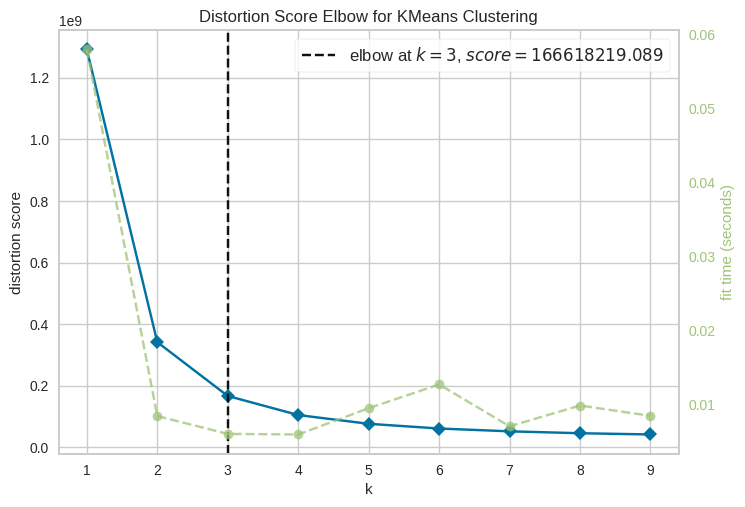

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()

visualizer=KElbowVisualizer(model,k=(1,10))
visualizer.fit(df)
visualizer.show()

In [18]:
# Menggunakan algoritma K-Means Clustering
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df)
df["target"]=kmeans.labels_

In [19]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1


Jalankan cell code ini untuk menyimpan model kamu.

In [20]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [37]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.labels_  # Label hasil clustering
score = silhouette_score(df, labels)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5404


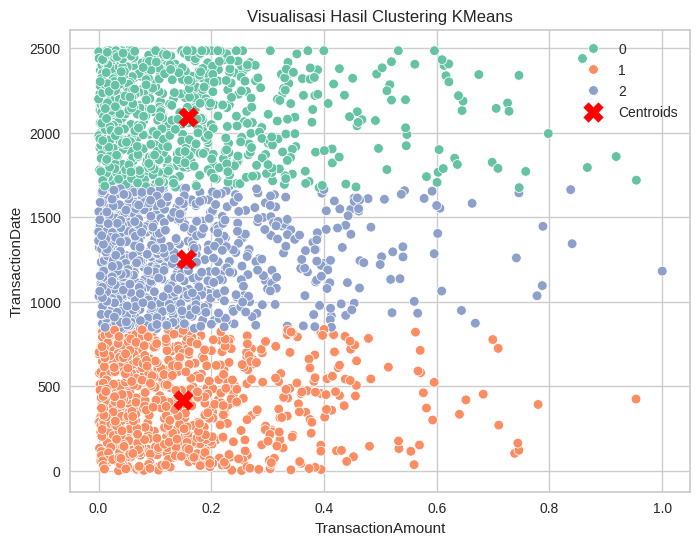

In [38]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=kmeans.labels_, palette='Set2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('Visualisasi Hasil Clustering KMeans')
plt.legend()
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [40]:
# Membangun model menggunakan PCA.
# Reduksi ke 2 komponen
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Konversi ke DataFrame baru jika ingin digunakan lebih lanjut
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca.head()
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.97973899 0.01996832]
Total explained variance: 0.9997073159711938


In [41]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [21]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
grouped=df.groupby('target')[numerical_cols].agg(['mean','min','max'])
grouped

TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
target                                                               
0               0.159254  0.000000  0.954092    0.428094  0.0  1.0   
1               0.149987  0.000313  0.953561    0.412540  0.0  1.0   
2               0.155522  0.000031  1.000000    0.447404  0.0  1.0   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
target                                                              
0                 0.382203  0.0  1.000000      0.031523  0.0  1.0   
1                 0.368306  0.0  0.996552      0.036250  0.0  1.0   
2                 0.382066  0.0  0.996552      0.022271  0.0  1.0   

       AccountBalance                      
                 mean       min       max  
target                                     
0            0.344354  0.000000  1.000000  
1            0.333257  0.000064  0.997633  
2            0.328340  0.001125  0.997144

In [22]:
grouped_transpose=grouped.T
grouped_transpose

target                           0         1         2
TransactionAmount   mean  0.159254  0.149987  0.155522
                    min   0.000000  0.000313  0.000031
                    max   0.954092  0.953561  1.000000
CustomerAge         mean  0.428094  0.412540  0.447404
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
TransactionDuration mean  0.382203  0.368306  0.382066
                    min   0.000000  0.000000  0.000000
                    max   1.000000  0.996552  0.996552
LoginAttempts       mean  0.031523  0.036250  0.022271
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
AccountBalance      mean  0.344354  0.333257  0.328340
                    min   0.000000  0.000064  0.001125
                    max   1.000000  0.997633  0.997144

In [23]:
categorical_cols=df.drop(columns=numerical_cols)
mode_values=categorical_cols.groupby('target').agg(lambda x:x.mode()[0])
print(mode_values)

        TransactionDate  TransactionType  Location  Channel  \
target                                                        
0                  2485                1        11        1   
1                     0                1         5        1   
2                   837                1        22        1   

        CustomerOccupation  PreviousTransactionDate  
target                                               
0                        3                      360  
1                        3                      240  
2                        2                       69  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0:**
  - **Rata-rata (mean) Customer Age:** 0.42
  - **MAX (max) Customer Age:** 1
  - **Rata-rata (mean) TransactionAmount :** 0.15
  - **MAX (max) TransactionAmount:** 0.9
  - **Analisis:** Cluster ini mencakup rata rata usia yang lebih muda dan pengeluaran muncrat. mereka memiliki durasi transaksi beragam tetapi cendrung memiliki saldo nya akun cukup baik tapi tidak terlalu tinggi

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [24]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [44]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

# inverse dataset yang sudah diencode ke kategori aslinya.
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # simpan encoder-nya
for col in categorical_cols:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col])
df.to_csv("data_clustering_inverse.csv", index=False)


In [52]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numerical_summary = df[numerical_cols].agg(['mean', 'min', 'max']).T
numerical_summary
# Menampilkan mode (nilai terbanyak) untuk tiap kolom kategorikal

extended_summary = df[numerical_cols].agg(['mean', 'min', 'max', 'median', 'std', 'count']).T
extended_summary

print("Descriptive Stats for Numerical Columns:\n")
print(extended_summary)


Descriptive Stats for Numerical Columns:

                             mean           min           max        median  \
TransactionAmount    1.095510e+09  9.578153e+05  7.066135e+09  7.839872e+08   
CustomerAge          1.726456e+05  7.032600e+04  3.086540e+05  1.741140e+05   
TransactionDuration  1.005128e+07  8.439100e+05  2.523291e+07  9.422110e+06   
LoginAttempts        2.292160e+01  2.100000e+01  8.500000e+01  2.100000e+01   
AccountBalance       1.126476e+12  2.240989e+10  3.314891e+12  1.036528e+12   

                              std   count  
TransactionAmount    1.073150e+09  2398.0  
CustomerAge          6.856255e+04  2398.0  
TransactionDuration  5.911044e+06  2398.0  
LoginAttempts        9.411761e+00  2398.0  
AccountBalance       8.634061e+11  2398.0  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
Cluster 0:
Rata-rata TransactionAmount: Rp 1.126.117.000

Rata-rata CustomerAge: 172.353

Rata-rata TransactionDuration: 10.165.470 detik (~2 jam 49 menit)

Rata-rata LoginAttempts: 23.02 kali

Rata-rata AccountBalance: Rp 1.156.189.000.000

Analisis:
Cluster ini menggambarkan pengguna dengan transaksi dan saldo sangat tinggi, durasi transaksi paling lama, serta aktivitas login stabil. Kemungkinan besar, ini adalah pengguna premium dengan akun lama dan intensitas penggunaan yang tinggi.

Cluster 1:
Rata-rata TransactionAmount: Rp 1.060.640.000

Rata-rata CustomerAge: 168.646

Rata-rata TransactionDuration: 9.826.526 detik (~2 jam 43 menit)

Rata-rata LoginAttempts: 23.32 kali

Rata-rata AccountBalance: Rp 1.119.653.000.000

Analisis:
Cluster ini memiliki nilai transaksi lebih rendah dibanding cluster lain, dengan usia akun dan saldo yang juga sedikit lebih rendah. Dapat diasumsikan bahwa pengguna dalam cluster ini adalah pengguna reguler dengan tingkat aktivitas normal, tidak terlalu lama atau terlalu baru.

Cluster 2:
Rata-rata TransactionAmount: Rp 1.099.750.000

Rata-rata CustomerAge: 176.955

Rata-rata TransactionDuration: 10.162.130 detik (~2 jam 49 menit)

Rata-rata LoginAttempts: 22.43 kali

Rata-rata AccountBalance: Rp 1.103.464.000.000

Analisis:
Cluster ini menunjukkan akun dengan usia paling lama, transaksi dan durasi cukup tinggi, namun saldo sedikit lebih rendah dibanding lainnya. Kemungkinan pengguna ini aktif namun tidak menyimpan dana terlalu besar di sistem, bisa jadi pengguna menengah ke atas yang rutin menarik saldo atau menggunakan layanan secara efisien.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)